- Title: Introduction to Linear Regression (early draft)
- Date: 2018-12-21
- Tags: statistics, regression, week9

The standard technique for measuring the relationship between one or more continuous independent variables and a continuous dependent variable is linear regression. 

The basic idea of linear regression can be expressed simply. A linear regression is a line (or some more dimensional geometric thingy) that maps the independent variables to the best predicted value for the dependent variable. 

Let's grab some data (we'll use the stuff from my book again to make it easy) and take a look at an example.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

df = pd.read_csv("http://rulelaw.net/downloads/rol-scores.csv")

In [2]:
df.head()

,State,Pop. In Millions for 2012,RoLScore,elec_pros,pol_plur,free_expr,assoc_org,per_auto,2012GDP,hprop,hfisc,hbiz,hlab,htra,hinv
0,Albania,3.2,42.60,8,10,13,8,9,1.264810e+10,30,92.6,81.0,49.0,79.8,65
1,Argentina,41.1,51.94,11,15,14,11,13,4.755020e+11,15,64.3,60.1,47.4,67.6,40
2,Australia,22.7,73.28,12,15,16,12,15,1.532410e+12,90,66.4,95.5,83.5,86.2,80
3,Austria,8.4,73.15,12,15,16,12,15,3.947080e+11,90,51.1,73.6,80.4,86.8,85
4,Bangladesh,154.7,31.57,9,11,9,8,9,1.163550e+11,20,72.7,68.0,51.9,54.0,55


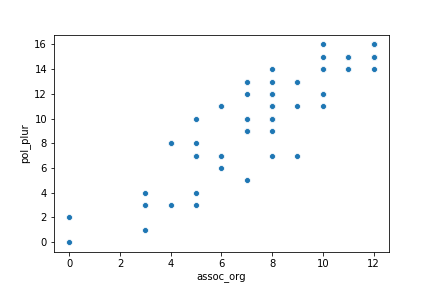

In [3]:
sns.scatterplot(df["assoc_org"], df["pol_plur"])

It looks like there's a strong relationship between these variables (which is to be expected---they're measures, of, respectively, a country's level of political pluralism and its protections for freedom of association---obviously, countries that respect people's freedom to join groups are likely to get more diverse groups!)

The idea of linear regression is: suppose we draw a straight line, the *regression line*, through that graph in such a way as to minimize the distance between the line and the data points on there.  (We actually minimize the squared distances, for mathematical reasons we won't bother with here.)

As you may recall from middle school, lines are described by an equation of the form 

$$y=mx+b$$

which translates to "for everything on the x axis, multiply its value by m and then add b, and you get the corresponding value for the y axis."

The equation describing our regression line will represent our best prediction for values of y, given values of x. And the distances we minimize are the errors for that prediction, also known as the *residuals*.


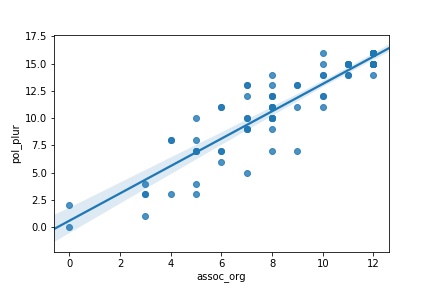

In [4]:
sns.regplot(df["assoc_org"], df["pol_plur"])

We can see that our line carves right down the middle of our data.

We can also get the equation for the line in the form of a regression model.

In [5]:
mod = sm.ols(formula='pol_plur ~ assoc_org', data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               pol_plur   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     481.8
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.11e-37
Time:                        17:51:35   Log-Likelihood:                -174.68
No. Observations:                  91   AIC:                             353.4
Df Residuals:                      89   BIC:                             358.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5877      0.524      1.122      0.2

We'll talk about what most of this stuff means, but for now, just look down into the second sub-table where it says "Intercept" and "assoc_org".  The first column of that table provides the coefficients.  Where assoc_org is x and pol_plur is y, this is equivalent to saying that the regression line is 

$$y = 1.2551x + 0.5877$$

and if you look at the chart, that looks about right.  (Let's put a grid on there to make it clearer)

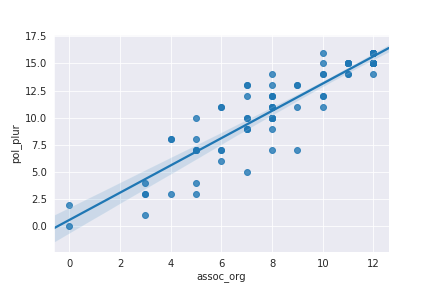

In [6]:
with sns.axes_style("darkgrid"):
    sns.regplot(df["assoc_org"], df["pol_plur"])

You see how, for example, 10 on the x axis hits the regression line just a little bit above 12.5 (should be around 13) on the y axis.  Our linear regression looks about right.

The string formula in the call to statsmodels, incidentally, is just the easiest way to compose a regression in Python. `smf.ols(formula='pol_plur ~ assoc_org', data=df)` means "run an ordinary least squares (ols) regression with pol_plur as the dependent, or y, variable, and assoc_org as the independent variable.  [Here's a description of how that formula system works](https://www.statsmodels.org/dev/example_formulas.html).  Generally you should use the fomula system with statsmodels regressions, in part because for some silly reason only when using the formulas does statsmodels calculate an intercept for our regression line.

Thinking about it visually for a second, our regression line actually describes the predicted value of our dependent variable for every value of our independent variable.  The distance between the line and our plotted datapoints represents our residuals.  With a bit more plotting work, we can visualize our residuals directly on the plot (don't worry about this code).

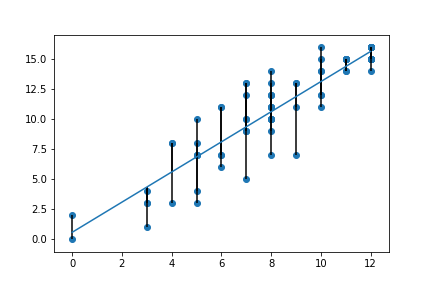

In [7]:
def plot_with_residuals(x, y, fitted_model):
    preds = fitted_model.predict()
    fig, ax = plt.subplots()
    x_sorted = np.sort(x)
    y_sorted = y[np.argsort(x)]
    preds_sorted = preds[np.argsort(x)]
    ax.plot(x_sorted,preds_sorted)
    ax.scatter(x_sorted,y_sorted)
    ax.vlines(x_sorted,y_sorted,preds_sorted)

plot_with_residuals(df["assoc_org"], df["pol_plur"], res)

The vertical lines there represent our residuals, although they don't give a full picture of them because some of them overlap.  In order to see more of the residuals, we can add "jitter" to the scatterplot in order to make sure none are directly vertically on top of one another.

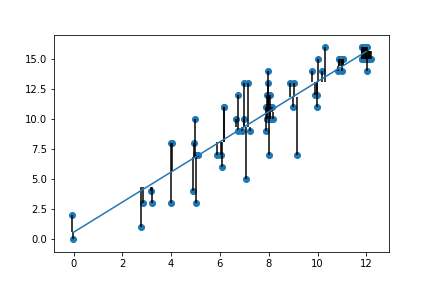

In [8]:
def jitter(arr):  # swiped from https://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def plot_with_jitter(x, y, fitted_model):
    preds = fitted_model.predict()
    fig, ax = plt.subplots()
    x_sorted = np.sort(x)
    y_sorted = y[np.argsort(x)]
    preds_sorted = preds[np.argsort(x)]
    ax.plot(x_sorted,preds_sorted)
    x_jittered = jitter(x_sorted)
    ax.scatter(x_jittered,y_sorted)
    ax.vlines(x_jittered,y_sorted,preds_sorted)

plot_with_jitter(df["assoc_org"], df["pol_plur"], res)

The great thing about regression is that we don't have to limit ourselves to one variable.  Here's something we can do: 

In [9]:
multi = sm.ols(formula='pol_plur ~ assoc_org + free_expr', data=df)
multires = multi.fit()
print(multires.summary())

                            OLS Regression Results                            
Dep. Variable:               pol_plur   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     289.1
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           2.07e-39
Time:                        17:51:35   Log-Likelihood:                -167.12
No. Observations:                  91   AIC:                             340.2
Df Residuals:                      88   BIC:                             347.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7985      0.597     -1.338      0.1

Here, the coefficients have the same meaning, they just describe a plane rather than a line, of the form $y = mx + nz + b$ where we've added z to for free_expr, and n= 0.4086.

This is the plane that minimizes squared distance between itself and the data we have, but now in three dimensions.

Note that the coefficients on assoc_org and the intercept have changed. This is to be expected.  Conceptually, what this is doing is capturing the relationship between each of the independent variables x and z, if we held the other one constant. 

If we want to be really fancy, we can even make a 3d plot of this regression plane.  Though this is typically not very useful, as it's kind of hard to see useful things in 3d plots. Still, I'll do it to show off. (Again, no need to pay attention to this code. And I'm not even going to try to put in lines for the residuals here.  If you want to get into 3d plotting, I recommend using a library that lets you work with interactive plots that you can drag around with the mouse and stuff---two good ones are bokeh and plotly.)

In [10]:
def regplane3d(y, x1, x2, df):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # get the regression fit
    model = sm.ols(formula='{} ~ {} + {}'.format(y, x1, x2), data = df)
    fit = model.fit()
    # lay out the range of x values for plotting and predicting
    # here I'm going to switch notation conventions from regression (y = x1 + x2) to 
    # dimensions s.t. x1 and x2 become x and y, and y becomes z (the 3rd dimension)
    x_surf = np.linspace(df[x1].min(), df[x1].max())
    y_surf = np.linspace(df[x2].min(), df[x2].max())
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    # predict over space of graph
    synthetic_data = pd.DataFrame({x1: x_surf.ravel(), x2: y_surf.ravel()})
    preds = fit.predict(exog=synthetic_data)
    # add surface plot
    ax.plot_surface(x_surf, y_surf, preds.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
    # add scatterplot
    ax.scatter(df[x1], df[x2], df[y],
           c='blue',
           marker='o',
           alpha=1)
    return fig

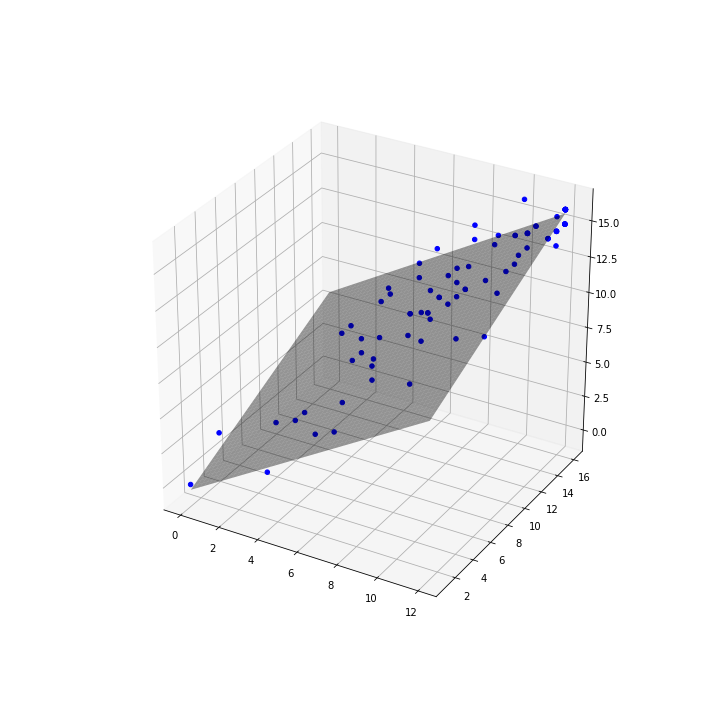

In [11]:
fig3d = regplane3d("pol_plur", "assoc_org", "free_expr", df)

Let's look at that summary again.

In [12]:
print(multires.summary())

                            OLS Regression Results                            
Dep. Variable:               pol_plur   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     289.1
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           2.07e-39
Time:                        17:51:36   Log-Likelihood:                -167.12
No. Observations:                  91   AIC:                             340.2
Df Residuals:                      88   BIC:                             347.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7985      0.597     -1.338      0.1

Here's the least you need to know to make sense of this.   (to be continued...)